<a href="https://colab.research.google.com/github/Harry040502/COMP1004-NODEJS/blob/main/COMP2002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RUN IN order for all Code to function properly



```
IMPORT LIBRARIES
```



In [13]:
#Import all relavent libraries
import matplotlib.pyplot as plt
import numpy as np
from numpy import std
import pydot
from numpy import mean
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn import preprocessing
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import export_graphviz

Attaining and formatting data must be reran for every regression type

Create X and y

In [14]:
df1 = pd.read_excel('ENB2012_data.xlsx')
X = df1.iloc[:,0:7].values
y = df1.iloc[:,8:9].values

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
y = min_max_scaler.fit_transform(y)

Random Forest Regression

In [15]:
#Create a dataframe containing the contents of ENB2012_data (preconverted to csv)
try:
  df1 = df1.astype(float)
except:
  df1.iloc[:1, :]
X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), test_size=0.2, random_state=0)
df1.head(5)
print('The shape of the dataframe is:', df1.shape)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 2)
rf.fit(X_train, y_train)
#Predicts test values
predictions = rf.predict(X_test)
rf_train = cross_val_score(rf, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
rf_test = cross_val_score(rf, X_test, y_test, cv=5, scoring="neg_mean_squared_error")



The shape of the dataframe is: (768, 10)




```
# This is formatted as code
```

MLP Regression


In [16]:
#Splits test data and training data
X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y))
#print(X, y)
regr = MLPRegressor(random_state=1, max_iter=5000).fit(X_train, y_train)
mlpscore_train = cross_val_score(regr, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
mlpscore_test = cross_val_score(regr, X_test, y_test, cv=5, scoring="neg_mean_squared_error")
predict = regr.predict(X)
#print("regr score", regr.score(X_test, y_test))
print(mean_squared_error(predict, y))

0.006381932725202422


SVR Regression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


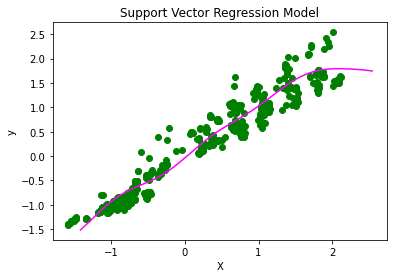

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when 

og [-1.36141775] ogend predstart: -1.4463099097202643 predend
[[-2.92508407 -2.91201093 -2.89872538 ...  0.33870639  0.33654216
   0.33429303]
 [-2.91508407 -2.90201093 -2.88872538 ...  0.34870639  0.34654216
   0.34429303]
 [-2.90508407 -2.89201093 -2.87872538 ...  0.35870639  0.35654216
   0.35429303]
 ...
 [ 1.00491593  1.01798907  1.03127462 ...  4.26870639  4.26654216
   4.26429303]
 [ 1.01491593  1.02798907  1.04127462 ...  4.27870639  4.27654216
   4.27429303]
 [ 1.02491593  1.03798907  1.05127462 ...  4.28870639  4.28654216
   4.28429303]]
Accuracy:  95.96742965789859 %


In [17]:
dataset = pd.read_excel('ENB2012_data.xlsx')
dataset = dataset.dropna(axis=1, how="all")
dataset = dataset.dropna(axis=0, how="any")


oldy = dataset.iloc[1:, 8:9]
oldX = dataset.iloc[1:, 9:10]

X_train, X_test, y_train, y_test = train_test_split(oldX, oldy, random_state=1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_train)
y = sc_y.fit_transform(y_train)
X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))

from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)
plt.scatter(y, X, color = 'green')
plt.plot(tuple(X_grid), regressor.predict(tuple(X_grid)), color = 'magenta')
plt.title('Support Vector Regression Model')
plt.xlabel("X")
plt.ylabel("y")
plt.show()


#crossvalue 

SVRscore_train = cross_val_score(regr, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
SVRscore_test = cross_val_score(regr, X_test, y_test, cv=5, scoring="neg_mean_squared_error")
#Accuracy
predictedx_Grid = regressor.predict(X_grid)
print("og", X_grid[5],"ogend predstart:", predictedx_Grid[5],"predend")
print(X_grid + predictedx_Grid)
#Mean Squared Error Shown
accuracy_SVR = 100-mean_squared_error(abs(X_grid), abs(regressor.predict(tuple(X_grid))))*100
print("Accuracy: ", 100-mean_squared_error(abs(X_grid), abs(regressor.predict(tuple(X_grid))))*100, "%")
#svr_plot = np.concatenate(predictedx_Grid, np.ndarray.max(predictedx_Grid), np.ndarray.min(float(predictedx_Grid)))

The magenta line is the predicted data and the green is the original Y1 against Y2 data

Plotting all regressions against each other

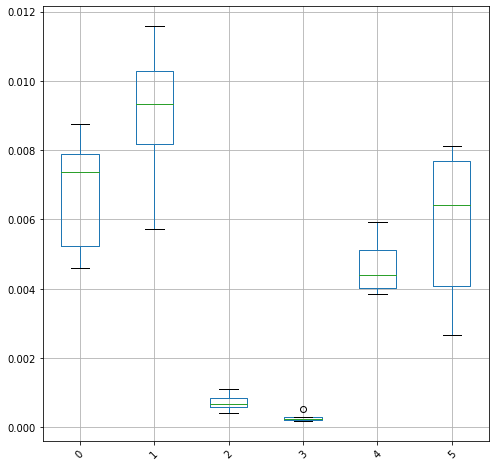

In [18]:
SVRscore_trainseries = pd.Series(SVRscore_train*-1/1000)
SVRscore_testseries = pd.Series(SVRscore_test*-1/1000)
mlpscore_trainseries = pd.Series(mlpscore_train*-1)
mlpscore_testseries = pd.Series(mlpscore_test*-1)
rf_testseries = pd.Series(rf_test*-1)
rf_trainseries = pd.Series(rf_train*-1)

resultsdf = pd.concat([mlpscore_trainseries, mlpscore_testseries, rf_testseries, rf_trainseries, SVRscore_trainseries, SVRscore_testseries], axis=1, join="inner")
boxplot = resultsdf.boxplot(figsize = (8,8),rot=45)


In [44]:
resultsdf.columns

RangeIndex(start=0, stop=4, step=1)

Part 2

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

In [22]:
precidenceviolations = 0
concurenceviolations = 0
data = pd.read_csv("Modules.txt", sep="|", header=None)
data.columns = ["Module", "Module leader", "Number of labs", "Modules cannot conflict"]
data["Modules cannot conflict"] = data["Modules cannot conflict"].str.split(",")

leclist = ['MOD001', 'MOD002', 'MOD003', 'MOD004', 'MOD005','MOD006','MOD007', 'MOD008','MOD009','MOD010','MOD011','MOD012','MOD013','MOD014','MOD015','MOD016','MOD017']
lablist = []
counter = 0
for x in data["Number of labs"]:
  for i in range(0, x):
    lablist.append(data["Module"][counter])
  counter = counter + 1
print(lablist)

np.random.shuffle(lablist)
np.random.shuffle(leclist)

def randomtable():
  #Table visualization
  #3 book a session #20 sessions a week
  #randomize populate the table and return
  #[Mon[Session1[Lecture_1, Lab_1, Lab_2]]]
  randomtable = [["","",""],["","",""], ["","",""], ["","",""], ["", "", ""], ["", "", ""], ["", "", ""],["", "", ""], ["", "", ""], ["", "", ""],["", "", ""], ["", "", ""], ["", "", ""],["", "", ""], ["", "", ""], ["", "", ""],["", "", ""], ["", "", ""], ["", "", ""],["", "", ""], ["", "", ""], ["", "", ""],["", "", ""], ["", "", ""], ["", "", ""],["", "", ""], ["", "", ""], ["", "", ""],["", "", ""], ["", "", ""]]
  labcounter = 0
  for i in range(0, len(randomtable)):
    try:
      randomtable[i][0] = leclist[i]
    except:
      randomtable[i][0] = ""
    for l in range(1,3):
      try:
        randomtable[i][l] = lablist[labcounter]
      except:
        randomtable[i][l] = ""
      labcounter+=1
    
  return(randomtable)
  print(randomtable)

['MOD001', 'MOD001', 'MOD002', 'MOD002', 'MOD003', 'MOD003', 'MOD004', 'MOD005', 'MOD005', 'MOD006', 'MOD006', 'MOD006', 'MOD007', 'MOD008', 'MOD008', 'MOD009', 'MOD009', 'MOD009', 'MOD010', 'MOD010', 'MOD011', 'MOD011', 'MOD012', 'MOD012', 'MOD013', 'MOD014', 'MOD014', 'MOD015', 'MOD015', 'MOD016', 'MOD017']


Precidence Constraint Handler 

In [23]:
def precidence(random):
  c = 0
  for i in range(0, len(random)):
    if random[i][0] == "":
      continue
    for x in range(0, len(random)):
      if x > i:
        break
      if random[i][0] == random[x][1]:
        c = c + 1
      if random[i][0] == random[x][2]:
        c = c + 1
  return c

In [24]:
def concurrence(random):
  c = 0
  #print(data["Number of labs"].tolist())
  labno = []
  for i in range(0, len(random)):
    for j in range(0, len(random[i])):
      if random[i][j] == "":
        continue
      constraintModules = []
      pos = data["Module"].values.T.tolist().index(random[i][j])
      #print("pos", pos)
      clash = data["Modules cannot conflict"].tolist()[pos]
      for k in range(0, len(random[i])):
        if k == j or random[i][k] == "":
          continue
        else:
          pos2 = data["Module"].values.T.tolist().index(random[i][k])
          clash2 = data["Modules cannot conflict"].tolist()[pos2]
          if random[i][j] in clash2 or random[i][k] in clash or random[i][j] == random[i][k]:
            c = c + 1
    return c

In [25]:
def constraints(random):
  return (precidence(random) * concurrence(random))

Part 2 (Generation of random solutions)

In [26]:
def table_mutate(table):
  toggler = False
  while toggler == False:
    i = np.random.randint(0,17)
    j = np.random.randint(0,2)
    x = np.random.randint(0,17)
    y = np.random.randint(0,2)
    if x == i and j == y:
      i = np.random.randint(0,17)
      j = np.random.randint(0,2)
      x = np.random.randint(0,17)
      y = np.random.randint(0,2)
      toggler = False
    else:
      toggler = True
      #print(i, j)

    l = table[i][j]
    table[i][j] = table[x][y]
    table[x][y] = l
  return table

In [27]:
def less_than_equal(a,b):
  return a<=b

In [28]:
def hillclimber(Niter, problem, generate, mutation, comparison):
  parent = randomtable()
  parent_fitness = problem(parent)

  for iter in range(Niter):
    #mutate
    child = mutation(parent)

    child_fitness = problem(child)
    
    if comparison(child_fitness, parent_fitness):
      parent = child
      parent_fitness = child_fitness

  return parent, parent_fitness

In [29]:
x, y = hillclimber(30, constraints, randomtable, table_mutate, less_than_equal) 
print(f"best solution : {x}, fitness {y}")

best solution : [['MOD017', 'MOD006', 'MOD015'], ['MOD015', '', 'MOD001'], ['MOD006', 'MOD008', 'MOD015'], ['MOD013', 'MOD009', 'MOD003'], ['MOD012', 'MOD011', 'MOD016'], ['MOD007', 'MOD010', 'MOD014'], ['MOD008', 'MOD005', 'MOD017'], ['MOD002', 'MOD002', 'MOD004'], ['MOD003', 'MOD016', 'MOD008'], ['MOD007', 'MOD012', 'MOD011'], ['MOD010', 'MOD005', 'MOD006'], ['MOD005', 'MOD009', 'MOD012'], ['MOD011', 'MOD003', 'MOD002'], ['MOD014', 'MOD001', 'MOD013'], ['MOD009', 'MOD010', 'MOD001'], ['MOD006', 'MOD009', ''], ['MOD004', 'MOD014', ''], ['', '', ''], ['', '', ''], ['', '', ''], ['', '', ''], ['', '', ''], ['', '', ''], ['', '', ''], ['', '', ''], ['', '', ''], ['', '', ''], ['', '', ''], ['', '', ''], ['', '', '']], fitness 22
